In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

In [30]:
import warnings
warnings.filterwarnings('ignore')

## Dataset description

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)\[[http://mlearn.ics.uci.edu/MLRepository.html](http://mlearn.ics.uci.edu/MLRepository.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01)]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

Based on the input values we want to determine if the cell class is benign or malignant.

In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Exploratory data analysis

In [5]:
# checking for nul values
df.isnull().value_counts()

ID     Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  BlandChrom  NormNucl  Mit    Class
False  False  False     False      False    False        False    False       False     False  False    699
dtype: int64

In [6]:
# checking if all values are numeric
df.applymap(np.isreal).value_counts()

ID    Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  BlandChrom  NormNucl  Mit   Class
True  True   True      True       True     True         False    True        True      True  True     699
dtype: int64

In [7]:
df.loc[:, ['BareNuc']].value_counts()

BareNuc
1          402
10         132
2           30
5           30
3           28
8           21
4           19
?           16
9            9
7            8
6            4
dtype: int64

In [8]:
# converting non-numeric values to numeric
df= df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

In [9]:
df.loc[:, ['BareNuc']].value_counts()

BareNuc
1          402
10         132
2           30
5           30
3           28
8           21
4           19
9            9
7            8
6            4
dtype: int64

In [10]:
df['Class'].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [11]:
X = df.iloc[:,:-1]

In [12]:
y = df['Class']

<AxesSubplot:>

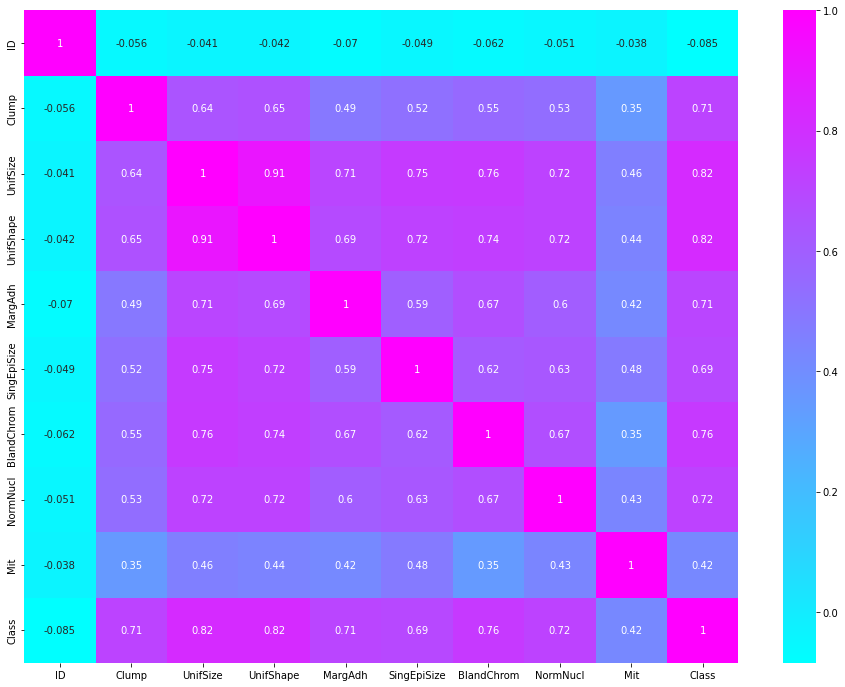

In [25]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.cool)

In [55]:
# splitting the data set into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (478, 10) (478,)
Test set: (205, 10) (205,)


## 1-Logistic Regression

In [63]:
# creating the logistic regression model
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
pd.DataFrame(classification_report(y_test, lr_pred, output_dict=True))

,2,4,accuracy,macro avg,weighted avg
precision,0.619512,0.0,0.619512,0.309756,0.383795
recall,1.000000,0.0,0.619512,0.500000,0.619512
f1-score,0.765060,0.0,0.619512,0.382530,0.473964
support,127.000000,78.0,0.619512,205.000000,205.000000


## 2-KNN

In [65]:
# creating the k-nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
pd.DataFrame(classification_report(y_test, knn_pred, output_dict=True))

,2,4,accuracy,macro avg,weighted avg
precision,0.707483,0.603448,0.678049,0.655466,0.667899
recall,0.818898,0.448718,0.678049,0.633808,0.678049
f1-score,0.759124,0.514706,0.678049,0.636915,0.666126
support,127.000000,78.000000,0.678049,205.000000,205.000000


## 3-Random Forest

In [27]:
# creatinf the random forest model
model = RandomForestClassifier()
model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [28]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

In [31]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

In [32]:
search.best_score_

0.9770175438596492

In [33]:
search.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 9}

In [66]:
pd.DataFrame(classification_report(y_test, preds, output_dict=True))

,2,4,accuracy,macro avg,weighted avg
precision,0.619512,0.0,0.619512,0.309756,0.383795
recall,1.000000,0.0,0.619512,0.500000,0.619512
f1-score,0.765060,0.0,0.619512,0.382530,0.473964
support,127.000000,78.0,0.619512,205.000000,205.000000


## 4-SVM

In [67]:
# creating the support vector machine model
kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
pd.DataFrame(classification_report(y_test, svc_pred, output_dict=True))

,2,4,accuracy,macro avg,weighted avg
precision,0.619512,0.0,0.619512,0.309756,0.383795
recall,1.000000,0.0,0.619512,0.500000,0.619512
f1-score,0.765060,0.0,0.619512,0.382530,0.473964
support,127.000000,78.0,0.619512,205.000000,205.000000


## Summary

Out of all four models it looks like the k-nearest neighbors one is the best performing model. It achieved the highest scores in all evaluation metrics for both cell classes. The next step could be creating the grid search for all model to check if the results will be the same.